# Building Sizes
- What's the breakdown of CO2e by building size? 
- 

In [6]:
import numpy as np
import pandas as pd
import geopandas as gp
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
from utils import geo 
from scipy import stats

In [10]:
df_districts = gp.read_file("../data/Council_Districts.geojson")

df_2020 = pd.read_csv('../data/2020_Building_Energy_Benchmarking.csv')
df_2020 = gp.GeoDataFrame(df_2020, geometry=gp.points_from_xy(df_2020.Longitude, df_2020.Latitude))
geo.clean_districts(df_2020, df_districts)

df_2019 = pd.read_csv('../data/2019_Building_Energy_Benchmarking.csv')
df_2019 = gp.GeoDataFrame(df_2019, geometry=gp.points_from_xy(df_2019.Longitude, df_2019.Latitude))
geo.clean_districts(df_2019, df_districts)

Building WATERWORKS OFFICE & MARINA 2353/ 4088803975 doesn't have a district POINT (-122.33895 47.63575) 
	 Found district 7 for WATERWORKS OFFICE & MARINA
Building NAUTICAL LANDING 2381/ 4088804350 doesn't have a district POINT (-122.34219 47.64306) 
	 Found district 7 for NAUTICAL LANDING
Building UNION HARBOR CONDOMINIUM 2540/ 8807200000 doesn't have a district POINT (-122.33003 47.6401) 
	 Found district 4 for UNION HARBOR CONDOMINIUM
Building THE PIER AT LESCHI 2997/ 6780900000 doesn't have a district POINT (-122.28563 47.59926) 
	 Found district 3 for THE PIER AT LESCHI
Building THE LAKESHORE 3046/ 1180001715 doesn't have a district POINT EMPTY 
Building EDUCARE 3218/ 2895800030 doesn't have a district POINT EMPTY 
Building WATERWORKS OFFICE & MARINA 2373/ 4088803975 doesn't have a district POINT (-122.33895 47.63575) 
	 Found district 7 for WATERWORKS OFFICE & MARINA
Building NAUTICAL LANDING 2402/ 4088804350 doesn't have a district POINT (-122.34219 47.64306) 
	 Found district 

In [17]:
df=pd.concat([df_2019, df_2020])

In [11]:
df_2020.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType',
       'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'EPAPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)',
       'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'geometry'],
      dtype='object')

In [12]:
df_2020['PropertyGFABuilding(s)'].describe().apply(lambda x: format(x, 'f'))

count       3628.000000
mean       90679.499173
std       210686.311621
min         9660.000000
25%        27547.000000
50%        43814.000000
75%        88790.250000
max      9320156.000000
Name: PropertyGFABuilding(s), dtype: object

DescribeResult(nobs=3628, minmax=(9660, 9320156), mean=90679.49917309813, variance=44388721904.55941, skewness=25.254185486928844, kurtosis=1026.5150828045673)


Text(0, 0.5, 'Count (LOG)')

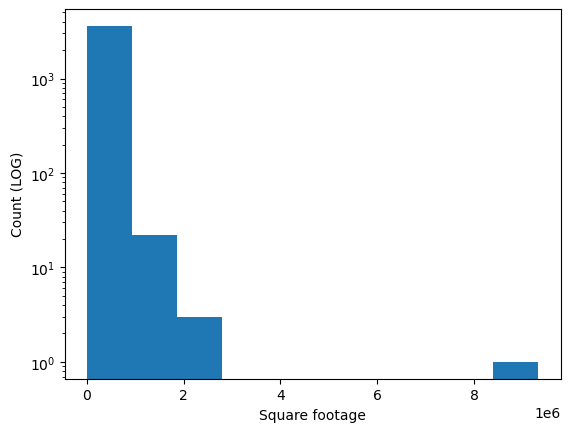

In [13]:
print(stats.describe(df_2020['PropertyGFABuilding(s)']))
plt.hist(df_2020['PropertyGFABuilding(s)'], log=True)
plt.xlabel("Square footage")
plt.ylabel("Count (LOG)")

In [14]:
print(stats.describe(df_2020['PropertyGFABuilding(s)'], nan_policy='omit'))

DescribeResult(nobs=3628, minmax=(9660, 9320156), mean=90679.49917309813, variance=44388721904.55941, skewness=25.254185486928844, kurtosis=1026.5150828045673)


In [ ]:
# TODO: violin graph of size range vs. average emissions

DescribeResult(nobs=3593, minmax=(masked_array(data=0.,
             mask=False,
       fill_value=1e+20), masked_array(data=43.7,
             mask=False,
       fill_value=1e+20)), mean=1.0813247982187586, variance=3.1812407833965692, skewness=masked_array(data=7.7169135,
             mask=False,
       fill_value=1e+20), kurtosis=121.94401987069187)


Text(0, 0.5, 'Count (LOG)')

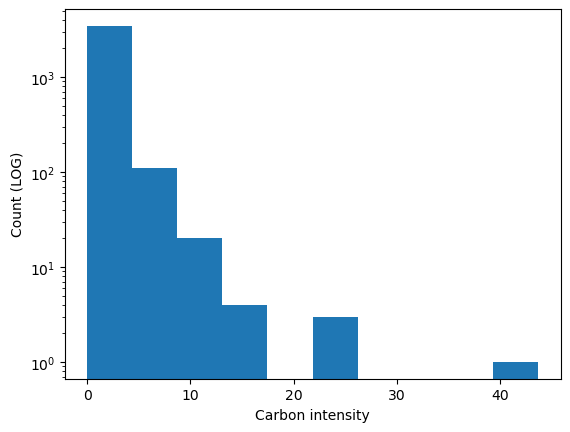

In [66]:
print(stats.describe(df_2020['GHGEmissionsIntensity'], nan_policy='omit'))
plt.hist(df_2020['GHGEmissionsIntensity'], log=True)
plt.xlabel("Carbon intensity")
plt.ylabel("Count (LOG)")

Small buildings stats: 
 count    1620.000000
mean        1.031049
std         1.550841
min         0.000000
25%         0.100000
50%         0.400000
75%         1.300000
max        17.400000
Name: GHGEmissionsIntensity, dtype: float64
Large buildings stats: 
 count    1973.000000
mean        1.122605
std         1.953529
min         0.000000
25%         0.200000
50%         0.700000
75%         1.300000
max        43.700000
Name: GHGEmissionsIntensity, dtype: float64
KstestResult(statistic=0.15878852910041225, pvalue=3.0437451731828475e-20)


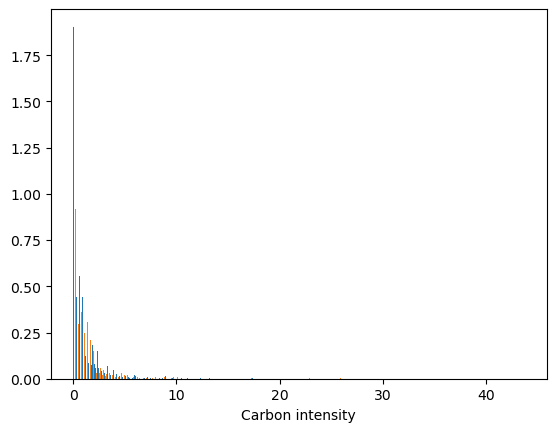

In [16]:
int_large = df_2020[df_2020['PropertyGFABuilding(s)'] >= 40000]['GHGEmissionsIntensity']
int_small = df_2020[df_2020['PropertyGFABuilding(s)'] < 40000]['GHGEmissionsIntensity']

print("Small buildings stats: \n", int_small.describe())
print("Large buildings stats: \n", int_large.describe())

plt.hist([int_small, int_large], density=True, bins='fd')
plt.xlabel("Carbon intensity")

# H0: small and large building carbon intensity follow the same distribution. 
# If p < 0.05 then can reject the null. 
# pvalue=0.0094 < 0.05 so reject null that small and large bulidings have same distribution. 
# Note to self: KS test when unbinned data, chi-squared when binned. 
print(stats.ks_2samp(int_small, int_large))

# Building Type Data
- What does intensity look like for each building type? 
- Hospitals the worst- most in district 3
- College/university also bad and they ALSO have labs, data centers
- Sum total emissions, square footage by each building type
- Currently in mayor's proposal vs. what we want
- Stretch goal: cute visualization for people in legislation
- total ghg per building type and also as a fraction of city-wide emissions

In [95]:
df_2020.groupby(df_2020['LargestPropertyUseType'])['GHGEmissionsIntensity'].mean().sort_values()

LargestPropertyUseType
Bank Branch                              0.050000
Convenience Store without Gas Station    0.100000
Energy/Power Station                     0.200000
Food Service                             0.200000
Movie Theater                            0.300000
                                           ...   
Supermarket/Grocery Store                4.521951
College/University                       4.546154
Data Center                              5.933333
Laboratory                               6.840000
Hospital (General Medical & Surgical)    7.450000
Name: GHGEmissionsIntensity, Length: 63, dtype: float64

In [99]:
df_2020[df_2020['LargestPropertyUseType']=="Hospital (General Medical & Surgical)"]['CouncilDistrictCode']

0    3.0
Name: CouncilDistrictCode, dtype: float64